### Let's load the data about udacity's users: 


In [138]:
# let's make it all beautiful with functions 

import unicodecsv 

def read_csv(filename):
    with open(filename,'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments_filename = '/Users/a.vodopianova/Downloads/enrollments.csv'
engagement_filename = '/Users/a.vodopianova/Downloads/daily_engagement.csv'
submissions_filename = '/Users/a.vodopianova/Downloads/project_submissions.csv'

enrollments = read_csv(enrollments_filename)
daily_engagement = read_csv(engagement_filename)
project_submissions = read_csv(submissions_filename)

print enrollments[0]
# print daily_engagement[0]
# print project_submissions[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}


### Let's update data types. They all are 'string' but default, which is not the most conveniet way for us.

In [139]:
from datetime import datetime as dt 

def parse_date(date): 
    if date == '': 
        return None 
    else: 
        return dt.strptime(date, "%Y-%m-%d")
    
def parse_maybe_int(i): 
    if i == '': 
        return None 
    else: 
        return int(i)
    
for enrollment in enrollments: 
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    #here we're giving enrollment['is_canceled'] a result of calculation "enrollment['is_canceled'] == True "
    # if it's true, then value is gonna be True, otherwise - False 
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True' 
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True' 
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
# enrollments[0]

In [140]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
# daily_engagement[0]

In [141]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

# project_submissions[0]

### Important!
Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [142]:
for eng_record in daily_engagement: 
    eng_record['account_key'] = eng_record['acct']
    del[eng_record['acct']]

In [143]:
def count_unique_users(data): 
    stud = set()
    for row in data: 
        stud.add(row['account_key'])
    return len(stud)

In [144]:
print 'enrollment rows', len(enrollments)
print 'enrollment students', count_unique_users(enrollments)
print 'engagement rows', len(daily_engagement)
print 'engagement students', count_unique_users(daily_engagement)
print 'submission rows', len(project_submissions)
print 'submission students', count_unique_users(project_submissions)

enrollment rows 1640
enrollment students 1302
engagement rows 136240
engagement students 1237
submission rows 3642
submission students 743


In [145]:
daily_engagement[0]['account_key']

u'0'

### Let's see why there are more students in enrollmenst then in daily_engagement! 

In [146]:
print 'enrollment students:', count_unique_users(enrollments)
print 'engagement students:', count_unique_users(daily_engagement)

stud_enr_set = set()
for row in enrollments: 
    stud_enr_set.add(row['account_key'])
                 
stud_eng_set = set()
for row in daily_engagement: 
    stud_eng_set.add(row['account_key'])   

weird_students = []
for stud in stud_enr_set: 
    if stud not in stud_eng_set: 
        weird_students.append(int(stud))
print '# of weird stud:', len(weird_students)
print 'initial diff in stud # between sets:', count_unique_users(enrollments)-count_unique_users(daily_engagement)

for i in range(0,len(enrollments)-1):
    if enrollments[i]['account_key'] not in stud_eng_set: 
        print  enrollments[i]

enrollment students: 1302
engagement students: 1237
# of weird stud: 65
initial diff in stud # between sets: 65
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 13, 0, 0), u'account_key': u'871', u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 15, 0, 0), u'account_key': u'1218', u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 4, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), u'days_to_cancel':

### Ok, so there are users with 0 days to cancel - that's why they are in enrollments, but they are not in daily eng stats - you probably need to be active for at least 1 day to get into this table. 
### So, let's see how many users with other problems are left in our data set:

In [147]:
# find number of records in enrollment absent in engagement with days to cancel other then 0
# and print these records 
cnt = 0 
for i in range(0,len(enrollments)-1):
    if enrollments[i]['account_key'] not in stud_eng_set and enrollments[i]['days_to_cancel']!=0: 
        cnt = cnt + 1 
        print enrollments[i]
print '# of corresponding records in enrollments:', cnt

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
# of corresponding records in enrollments: 3


### Let's remove these test users (u'is_udacity': True) from our data and save it to a new variable

In [148]:
udacity_test_accounts = set() 
for enrollment in enrollments:
    if enrollment['is_udacity']: 
        udacity_test_accounts.add(enrollment['account_key'])
print 'There are',len(udacity_test_accounts), 'test udacity accounts. Lets create a function to exclude them:'

def remove_test_acc(data):
    cleaned_data = [] 
    for data_point in data: 
        if data_point['account_key'] not in udacity_test_accounts: 
            cleaned_data.append(data_point)
    return cleaned_data

non_udacity_enrollments = remove_test_acc(enrollments)
non_udacity_engagement = remove_test_acc(daily_engagement)
non_udacity_submissions = remove_test_acc(project_submissions)

print 'non_udacity_enrollments length:', len(non_udacity_enrollments)
print 'non_udacity_engagement length:', len(non_udacity_engagement)
print 'non_udacity_submissions length:', len(non_udacity_submissions)

There are 6 test udacity accounts. Lets create a function to exclude them:
non_udacity_enrollments length: 1622
non_udacity_engagement length: 135656
non_udacity_submissions length: 3634


### Creating a dictionary with students who either haven't cancelled or who stayed enrolled for at least 7 days 

In [149]:
paid_students = {}
for enrollment in non_udacity_enrollments: 
    if enrollment['is_canceled'] == False or enrollment['days_to_cancel'] > 7: 
        #print enrollment[i]
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        # there might be fe enrollments per student, let's keep the date of the most recent
        if account_key not in paid_students or enrollment_date > paid_students[account_key]: 
            paid_students[account_key]=enrollment_date

print len(paid_students)

995


## Getting Data from First Week

In [150]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0
# we added "and time_delta.days>=0" later to fix this function 

In [151]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

# first let's have data for paid users only 
def remove_free_trials(data): 
    new_data = []
    for data_point in data: 
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trials(non_udacity_enrollments)
paid_engagement = remove_free_trials(non_udacity_engagement)
paid_submissions = remove_free_trials(non_udacity_submissions)


# let's see how many records are out there: 
print 'paid_enrollments records:',len(paid_enrollments)
print 'paid_engagement records:',len(paid_engagement)
print 'paid_submissions records:',len(paid_submissions)

paid_enrollments records: 1293
paid_engagement records: 134549
paid_submissions records: 3618


In [152]:
for eng in paid_engagement: 
    if eng['num_courses_visited'] > 0: 
        eng['has_visited'] = 1 
    else: 
        eng['has_visited'] = 0

In [153]:
# now let's create a list of rows from the eng table with only rows where stud is paid and within 1 week from start 
paid_engagement_in_first_week = []

for eng in paid_engagement:
    acc_key = eng['account_key']
    join_date = paid_students[acc_key]
    engagement_date = eng['utc_date']
    
    if within_one_week(join_date, engagement_date): 
        paid_engagement_in_first_week.append(eng)

print 'paid_engagement_in_first_week:', len(paid_engagement_in_first_week)

paid_engagement_in_first_week: 6919


### Let's investigate a little bit: average time paid users spent in the classroom

In [154]:
from collections import defaultdict
# defaultdict allows us to specify default value. 
# In this case we want to get an emply list if there is no value with the key 

engagement_by_account = defaultdict(list)
for eng_record in paid_engagement_in_first_week: 
    account_key = eng_record['account_key']
    engagement_by_account[account_key].append(eng_record)

In [155]:
total_minutes_by_acc = {}

for account_key, eng_for_student in engagement_by_account.items():
    total_minutes = 0 
    for eng_record in eng_for_student: 
        total_minutes += eng_record['total_minutes_visited']
    total_minutes_by_acc[account_key] = total_minutes

In [156]:
total_minutes = total_minutes_by_acc.values()

import numpy as np
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Min:', np.min(total_minutes)
print 'Max:', np.max(total_minutes)

# yea, python has its own min and max functions, we'll find out later why it's better to use nympy min and max 

Mean: 306.708326753
Standard deviation: 412.996933409
Min: 0.0
Max: 3564.7332645


### Well, MAX value is strange! 10568 minutes is more then 7 days. That's weird, let's investigate.

In [157]:
stud_with_max_minutes = None 
max_minutes = 0 

for student, total_minutes in total_minutes_by_acc.items(): 
    if total_minutes > max_minutes: 
        max_minutes = total_minutes
        stud_with_max_minutes = student
print 'max_minutes', max_minutes
print 'max_minutes', student

max_minutes 3564.7332645
max_minutes 479


In [158]:
for eng_rec in paid_engagement_in_first_week: 
    if eng_rec['account_key'] == stud_with_max_minutes: 
        print eng_rec

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

#### Hmmm, so the first record for student with max (10568) minutes during first week is Jan 2015; last - Apr 4th. It's not within 7 days!! Let's go back and fix that function within_one_week by adding: and time_delta.days>=0

### Now let's get # of lessons completed in first week

In [159]:
total_lessons_by_acc = {}

for account_key, eng_for_student in engagement_by_account.items():
    total_accs = 0 
    for eng_record in eng_for_student: 
        total_accs += eng_record['lessons_completed']
    total_lessons_by_acc[account_key] = total_accs

total_lessons = total_lessons_by_acc.values()

import numpy as np
print 'total_lessons Mean:', np.mean(total_lessons)
print 'total_lessons Standard deviation:', np.std(total_lessons)
print 'total_lessons Min:', np.min(total_lessons)
print 'total_lessons Max:', np.max(total_lessons)

total_lessons Mean: 1.63618090452
total_lessons Standard deviation: 3.00256129983
total_lessons Min: 0
total_lessons Max: 36


### Let's do same but with a function

In [160]:
from collections import defaultdict
# defaultdict allows us to specify default value. 
# In this case we want to get an emply list if there is no value with the key 

def group_data(data,key_name):
    grouped_data = defaultdict(list)
    for data_point in data: 
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

# engagement_by_acc = group_data(paid_engagement_in_first_week,'account_key')

def sum_grouped_values(grouped_data,field_name): 
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0 
        for data_point in data_points: 
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

# total_minutes_by_acc = sum_grouped_values(engagement_by_acc,'total_minutes_visited'):

Populating the interactive namespace from numpy and matplotlib
Mean: 1.63618090452
Standard deviation: 3.00256129983
Min: 0
Max: 36


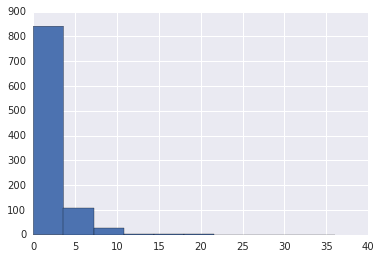

In [161]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt 

def describe_data(data): 
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Min:', np.min(data)
    print 'Max:', np.max(data)
    plt.hist(data)

# describe_data(total_minutes)

engagement_by_acc = group_data(paid_engagement_in_first_week,'account_key')
total_lessons_by_acc = sum_grouped_values(engagement_by_acc,'lessons_completed')
describe_data(total_lessons_by_acc.values())

### Let's analyze number of days students spend on udacity during with courses visiting on their first week. For this we'll go back and update paid_engagements by adding a new field: has_visited. And then apply above logic for calculations.

Mean: 2.86733668342
Standard deviation: 2.25519800292
Min: 0
Max: 7


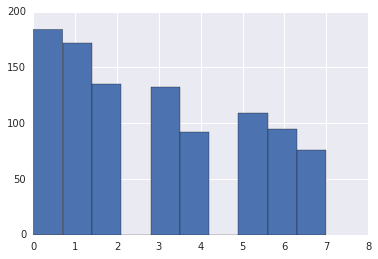

In [162]:
engagement_by_acc = group_data(paid_engagement_in_first_week,'account_key')
total_has_visited = sum_grouped_values(engagement_by_acc,'has_visited')
describe_data(total_has_visited.values())


### Create 2 lists of engagement data for paid students in the first week: passed 1st lesson and didn't pass.

#### We need users completed spesific lesson (we have lesson key). But what does it mean "completed"? Let's check possible values for 'assigned_rating' in paid_submissions:

In [163]:
print paid_submissions[0]

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': datetime.datetime(2015, 1, 16, 0, 0), u'creation_date': datetime.datetime(2015, 1, 14, 0, 0)}


In [164]:
processing_states = set()
for subm in paid_submissions: 
    if subm['lesson_key'] in subway_project_lesson_keys: 
        processing_states.add(subm['assigned_rating'])
print processing_states

set([u'', u'DISTINCTION', u'UNGRADED', u'PASSED', u'INCOMPLETE'])


In [165]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

students_passed_first_lesson = set()

for subm in paid_submissions: 
    if subm['lesson_key'] in subway_project_lesson_keys and subm['assigned_rating'] in ["PASSED","DISTINCTION"]: 
        students_passed_first_lesson.add(subm['account_key'])
        
print 'students_passed_first_lesson:', len(students_passed_first_lesson)

students_passed_first_lesson: 647


In [166]:
for eng in paid_engagement_in_first_week: 
    if eng['account_key'] in students_passed_first_lesson: 
        passing_engagement.append(eng)

for eng in paid_engagement_in_first_week: 
    if eng['account_key'] not in students_passed_first_lesson: 
        non_passing_engagement.append(eng)    

print 'passing_engagement:', len(passing_engagement)
print 'non_passing_engagement:', len(non_passing_engagement)

passing_engagement: 4527
non_passing_engagement: 2392


### It's time to recalculate mean, std, min, max per group: passed the 1st project or no: 

passing students, lessons_completed:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Min: 0
Max: 36

non_passing students, lessons_completed:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Min: 0
Max: 27


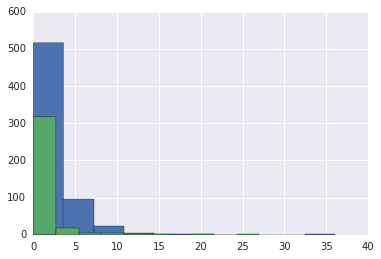

In [167]:
print 'passing students, lessons_completed:'
passing_engagement_by_acc = group_data(passing_engagement,'account_key')
total_lessons_by_acc = sum_grouped_values(passing_engagement_by_acc,'lessons_completed')
describe_data(total_lessons_by_acc.values())
print ''
print 'non_passing students, lessons_completed:'
non_passing_engagement_by_acc = group_data(non_passing_engagement,'account_key')
non_total_lessons_by_acc = sum_grouped_values(non_passing_engagement_by_acc,'lessons_completed')
describe_data(non_total_lessons_by_acc.values())

passing students, total_minutes_visited:
Mean: 394.586046484
Standard deviation: 448.499519327
Min: 0.0
Max: 3564.7332645

non_passing students, total_minutes_visited:
Mean: 143.326474267
Standard deviation: 269.538619011
Min: 0.0
Max: 1768.52274933


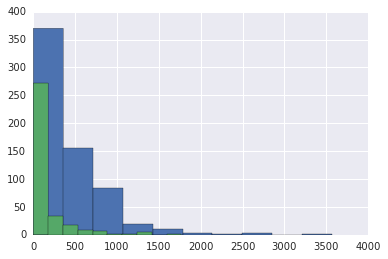

In [168]:
print 'passing students, total_minutes_visited:'
passing_engagement_by_acc = group_data(passing_engagement,'account_key')
total_minutess_by_acc = sum_grouped_values(passing_engagement_by_acc,'total_minutes_visited')
describe_data(total_minutess_by_acc.values())
print ''
print 'non_passing students, total_minutes_visited:'
non_passing_engagement_by_acc = group_data(non_passing_engagement,'account_key')
non_total_minutess_by_acc = sum_grouped_values(non_passing_engagement_by_acc,'total_minutes_visited')
describe_data(non_total_minutess_by_acc.values())

passing students, days visited:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Min: 0
Max: 7

non_passing students, days visited:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Min: 0
Max: 7


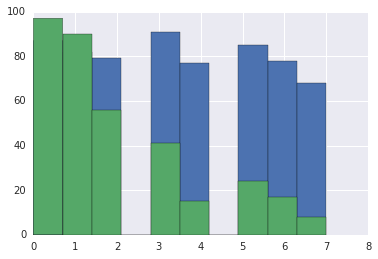

In [169]:
print 'passing students, days visited:'
passing_engagement_by_acc = group_data(passing_engagement,'account_key')
total_visits_by_acc = sum_grouped_values(passing_engagement_by_acc,'has_visited')
describe_data(total_visits_by_acc.values())
print ''
print 'non_passing students, days visited:'
non_passing_engagement_by_acc = group_data(non_passing_engagement,'account_key')
non_total_visits_by_acc = sum_grouped_values(non_passing_engagement_by_acc,'has_visited')
describe_data(non_total_visits_by_acc.values())

### This graph looks weird! why do we have these gaps??? There're just 7 days in a week. Therefore, there should be 7 bins on this histogram. Let's force python to do so :) 

## Time to do some plots!

In [170]:
### Let's try once and then add plt.hist(data) to our "describe" function to avoid writing same code for 6 histograms :) 

total_visits_by_acc:


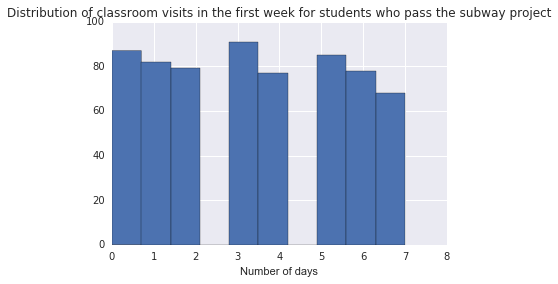

In [171]:
print 'total_visits_by_acc:'
plt.hist(total_visits_by_acc.values())
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

non_total_visits_by_acc:


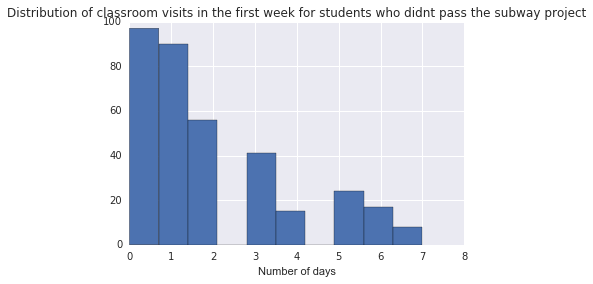

In [172]:
print 'non_total_visits_by_acc:'
plt.hist(non_total_visits_by_acc.values())
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who didnt pass the subway project')

### We can make these plots a little more beautiful by using seaborn lib. To install it, run "conda install seaborn" from the terminal.

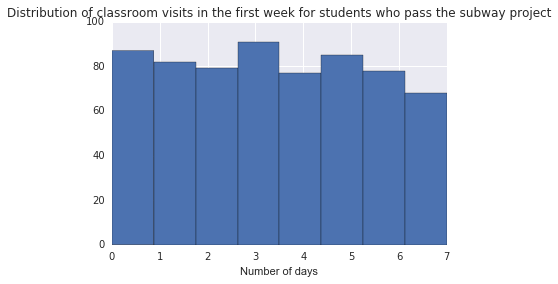

In [173]:
import seaborn as sns

plt.hist(total_visits_by_acc.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

#plt.hist(data, bins=20) would make sure your histogram has 20 bins.